# Introduction

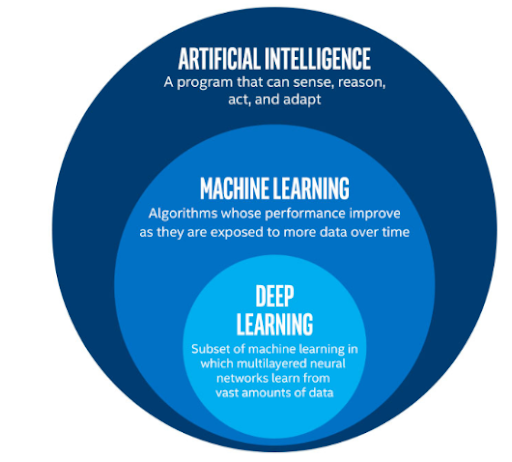

**Definition du deep learning:** <br>
Le deep learning est une technique de l'apprentissage automatique qui utilise des réseaux de neurones profonds pour analyser les données. Les réseaux de neurones profonds sont des architectures de réseaux de neurones qui ont plusieurs couches de neurones interconnectés, ce qui leur permet de mieux modéliser les données complexes que les réseaux de neurones plus simples. Le deep learning a été utilisé avec succès dans de nombreux domaines, tels que la reconnaissance de l'image et de la parole, la traduction automatique et la prédiction des séries chronologiques.


 **Tout a commencé avec un neurone** <br>
Au début des années 1940, Warren McCulloch, un neurophysiologiste, s'est associé au logicien Walter Pitts pour créer un modèle de fonctionnement du cerveau. Il s'agissait d'un modèle linéaire simple qui produisait une sortie positive ou négative, compte tenu d'un ensemble d'entrées et de pondérations.<br>

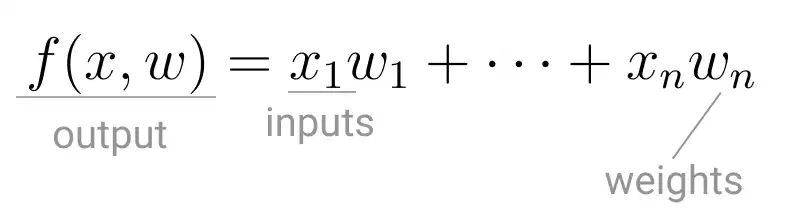

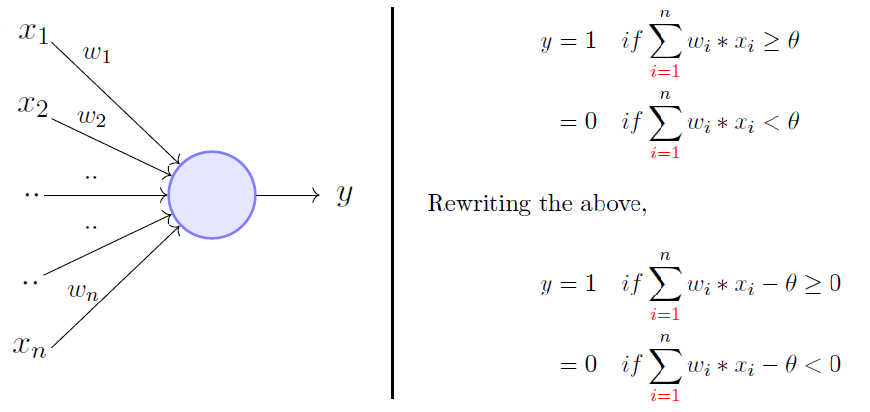
<br>
Ce modèle de calcul a été intentionnellement appelé neurone, car il tentait d'imiter le fonctionnement de l'élément de base du cerveau. Tout comme les neurones du cerveau reçoivent des signaux électriques, le neurone de McCulloch et Pitts reçoit des entrées et, si ces signaux sont suffisamment forts, les transmet à d'autres neurones.
<br>
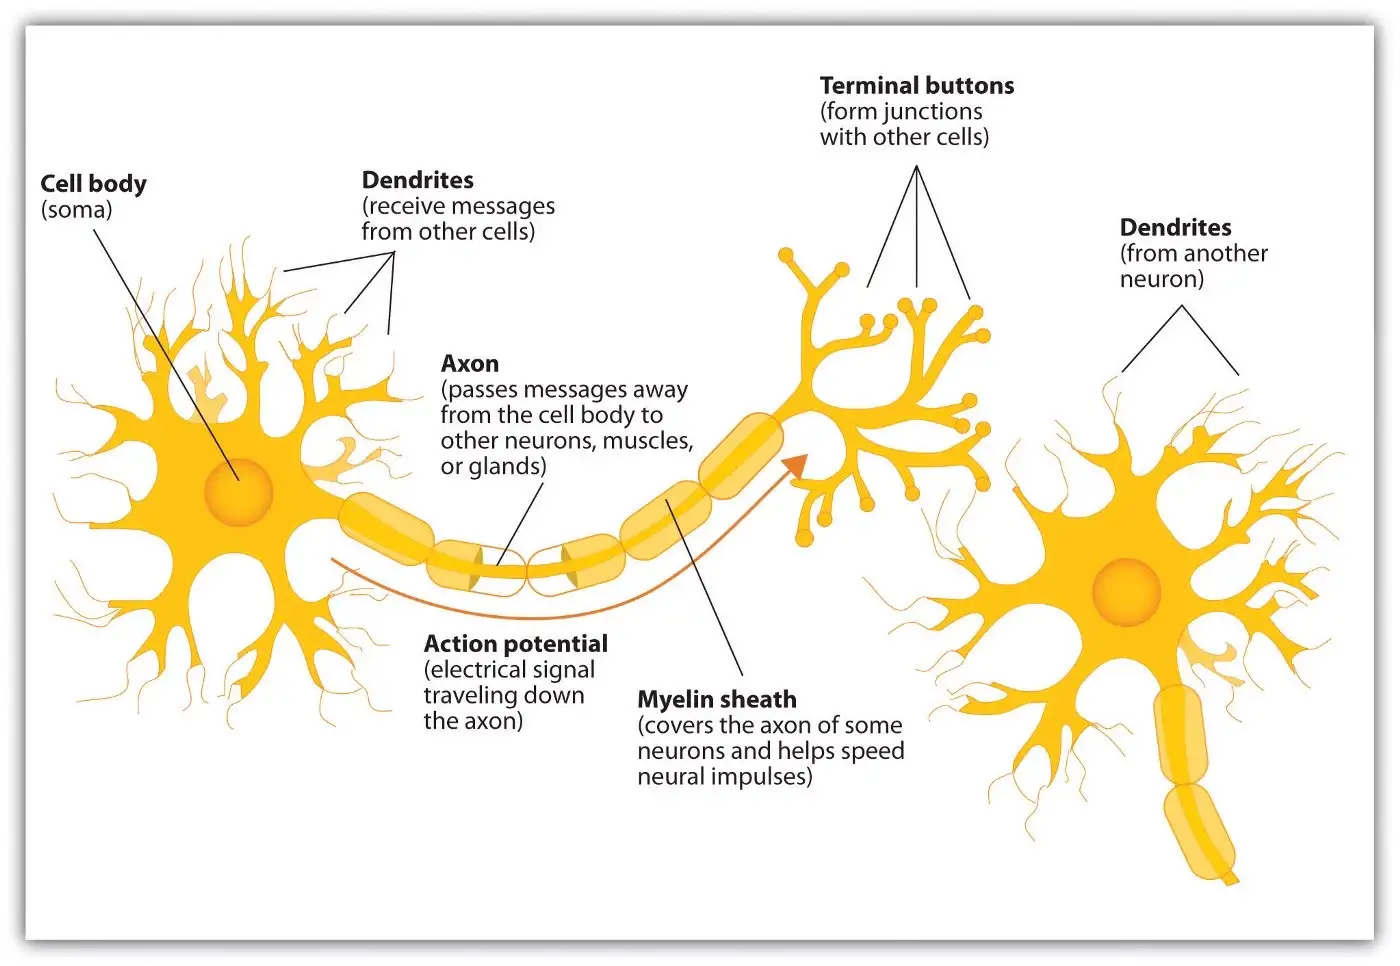
<br>
Le rôle de la fonction d’activation ici est d’introduire la non-linéarité pour capturer les relations entre variables indépendantes et dépendantes qui ne peuvent être capturées par de simples additions et produits scalaires. Le bias quant à lui sert augmenter ou diminuer la sensibilité du neurone en déplacement son seuil d'activiation (plus de détails sur le rôle et le choix du bias dans le prochain article).

Aujourd’hui, la plupart des couches cachées utiliseront la fonction relu comme activation et la fonction softmax pour la couche de sortie afin d’obtenir une variable de sortie entre 0 et 1. Mais plusieurs autres fonctions existent et certains cas comme les problèmes de régression nécessitent même parfois que la couche de sortie n’utilise aucune fonction d’activation sur ses neurones.




# Les réseaux de neurones

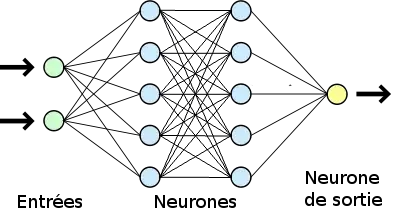


Il s'agit comme le nom le sous-entend d'un regroupement de composantes de base appelés neurones qui sont interconnectés entre eux. Les neurones sont organisés en 3 types de couches :<br><br>

**La couche d’entrée :**  Elle contient des neurones qui ont des valeurs correspondant à la représentation sous forme de tenseur de la donnée sur laquelle on souhaite travailer (soit une image, un texte, ou une liste d'entrées dans une base de données par exemple). Un tenseur est tout simplement une représentation multidimensionelle de ces données d'entrées. Il peut être un vecteur, une matrice ou une structure de données d'une plus grande dimension.<br>
**Les couches cachées :** Elles contiennent des valeurs intermédiaires calculées lors de l'entrainement du réseau de neurones afin de "capturer" les variables qui permettront à partir des données entrées, d'obtenir le résultat attendu. Par exemple, les neurones cachés permettront de capturer la relation entre une image d'un chiot (représenté sous forme de tenseur) et la catégorie "chien" dans laquelle il est sensé être classifié.
**La couche de sortie :** Elle contient des neurones ayant comme valeurs le résultat de notre opération. Par exemple, Pour un problème de classification d'image de chats et de chiens, on pourra avoir deux neurones de sortie contenant la probabilité que l'image soit effectivement un chat ou un chien.<br>
Selon le type de neurones et le type de leur interconnexion, plusieurs architectures de réseaux de neurones existent permettant de résoudre différents problèmes. Une carte assez complète des options existantes est disponible ici . Pour vous donner une idée, en général, on utilisera :<br><br>

Les réseaux/couches densement ou complètement connectés pour traiter les données à deux dimensions donc pour de simples problèmes de classification de texte ou de transactions par exemple.<br>

Les réseaux LSTM pour le traitement des données 3D donc dans l’écriture et la reconnaissance de discours par exemple.<br>
Les réseaux convolutionels CNN pour les données 4D et donc idéalement pour le traitement de vidéos/images.<br>


#Entrainement

**L’entrainement du réseau** <br>
L’entrainement d'un réseau de neurones est le processus durant lequel la configuration d'un réseau de neurones est modifiée au fur et à mesure que les données d'entrée y sont passées jusqu'à ce que le réseau soit en mesure de faire prédictions correctes sur des données nouvelles (non utilisées lors de l'entrainement) . L'entrainement d’un réseau de neurones comprend deux étapes principales.<br>

**L’algorithme FeedForward** <br>
Chaque neurone de la première couche cachée reçoit en entrée les valeurs de la couche d'entrée multipliées par les poids des connections les reliant, le tout passé au travers de la fonction associée à tous les neurones de la couche en question. Ce résultat est ensuite passé comme entrée aux neurones de la seconde couche cachée et ainsi de suite jusqu'à ce que l'on obtienne les résultats de la couche de sortie.<br>
**Une fonction de perte** va permettre de calculer la différence entre le résultat obtenu par le réseau et le résultat correct. Cette différence sera utilisée pour modifier les poids des connections afin que les prochaines prédictions soient plus précises. C’est en cela que consiste l’entrainement du réseau de neurones.<br>
**L’algorithme rétropropagation du gradient** <br>
Dans le but de faire des prédictions plus précises, il faut être en mesure de diminuer le résultat de la fonction de perte qui calcule la différence entre les résultats corrects et les résultats prédits. L'une des fonctions de perte les plus populaires est le MSE (Mean Squared Error) ou Erreur Quadratique Moyenne dont la formule est la suivante :<br>
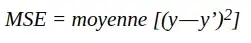

**Resumé de l'entrainement **:<br>
1. Tirer un lot de données d’entrainement Xi et les prédictions correctes Yi correspondantes.
2. Exécuter l’algorithme du feedforward pour obtenir les Yi’ prédits.
3. Calculer la différence/perte entre les sorties attendues et obtenues en utilisant la fonction de perte (MSE ou autre)
4. Calculer le gradient (la dérivée) de la fonction de perte avec comme valeurs des inconnues, les paramètres du réseau qui ont généré les résultats obtenus.
6. Modifier les poids des connexions du réseau dans la direction réduisant le gradient suivant la formule :
W’ = W +/- (pas * gradient)
7. Faire passer le prochain lot de données et réexecuter les étapes 1–5 jusqu'à obtenir des prédictions satisfaisantes.

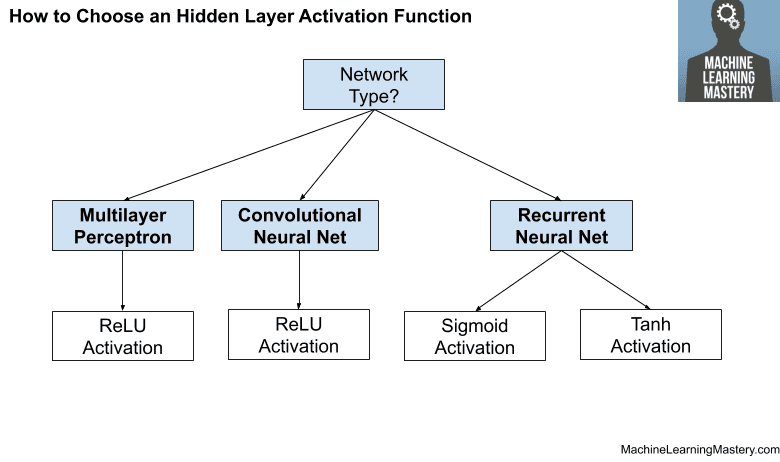

#  Pratique

In [ ]:
#importation des données (du dataset)
from keras.datasets import mnist

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data() #chargement des données


In [ ]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape #les dimensions

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

In [ ]:
import matplotlib.pyplot as plt


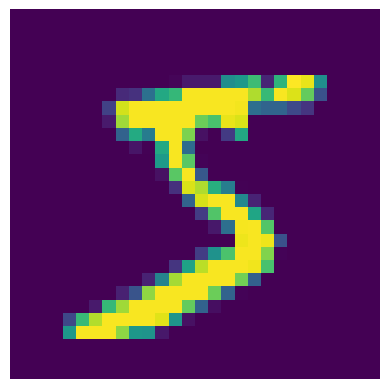

In [ ]:
plt.imshow(X_train[0])
plt.axis("off")
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_train_enc=to_categorical(y_train,10)
y_test_enc=to_categorical(y_test,10)

In [ ]:
y_train_enc[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train[0].max() #(0,255)

255

In [ ]:
X_train_norm= X_train/255 #normalisatin
X_test_norm= X_test /255
#reshape des images
X_train_norm=X_train_norm.reshape(60000,784,1)
X_test_norm=X_test_norm.reshape(10000,784,1)

## Model

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Input

In [ ]:

def get_model(input_shape,classes):

  model= Sequential() #initialisation du model

  model.add(Input(input_shape)) #definition de la couche d'entrée 1

  model.add(Dense(units=64, activation="relu")) #couche caché 2

  model.add(Dense(units=16, activation="relu")) #couche cahé 3


  model.add(Dense(units=120, activation="relu")) #couche cahé

  model.add(Dense(units=84, activation="relu")) #couche cahé

  model.add(Dense(units=classes, activation="softmax")) #chouche de sortie 4

  return model

In [ ]:
model = get_model(input_shape=(784,), classes=10)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 120)               2040      
                                                                 
 dense_3 (Dense)             (None, 84)                10164     
                                                                 
 dense_4 (Dense)             (None, 10)                850       
                                                                 
Total params: 64,334
Trainable params: 64,334
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
history=model.fit(X_train_norm,y_train_enc,epochs=10, batch_size=64,validation_data=(X_test_norm,y_test_enc) )

Epoch 1/10
938/938 [==============================] - 10s 5ms/step - loss: 0.3487 - accuracy: 0.8927 - val_loss: 0.1719 - val_accuracy: 0.9475
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1418 - accuracy: 0.9574 - val_loss: 0.1299 - val_accuracy: 0.9594
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1068 - accuracy: 0.9677 - val_loss: 0.1304 - val_accuracy: 0.9600
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0866 - accuracy: 0.9734 - val_loss: 0.1063 - val_accuracy: 0.9692
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0751 - accuracy: 0.9769 - val_loss: 0.1107 - val_accuracy: 0.9675
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0622 - accuracy: 0.9806 - val_loss: 0.0937 - val_accuracy: 0.9715
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0572 - accuracy: 0.9815 - val_loss: 0.1021 - val_accuracy: 0.9713
Epoch

In [ ]:
history.history['accuracy']

[0.8926500082015991,
 0.9574000239372253,
 0.9676833152770996,
 0.9733999967575073,
 0.9769333600997925,
 0.9806166887283325,
 0.9814833402633667,
 0.98458331823349,
 0.9852666854858398,
 0.9868833422660828]

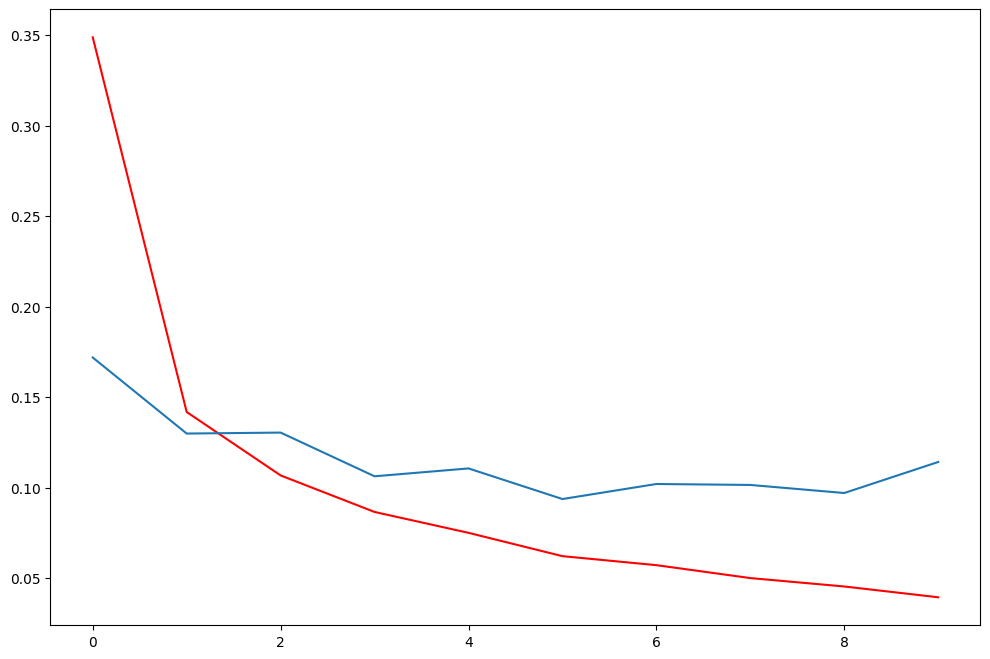

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], c="r")
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
y_pred=model.predict(X_test_norm[0].reshape(1,784,1))

1/1 [==============================] - 0s 87ms/step


In [ ]:
y_pred

array([[9.7651053e-08, 2.0672363e-08, 1.9850675e-06, 4.9704295e-06,
        4.3207973e-10, 2.5324285e-09, 5.0648857e-14, 9.9998987e-01,
        7.1224224e-07, 2.3787165e-06]], dtype=float32)

In [ ]:
y_pred.max()

0.99998987

In [ ]:
y_pred.argmax()

7

In [ ]:
y_test[0]

7

## Optimisation des hyper paramettre



# Exercice

In [ ]:
from keras.datasets import mnist #importation du datasets

1: separer en train et test

2  implementer votre modele de deep learning

3 afficher votre accurancy

In [ ]:
X_train_l= X_train_norm.resahpe(X_train_norm.shape[0],784,)